In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from pandas.plotting import bootstrap_plot
import seaborn as sns

In [78]:
df = pd.read_csv("All_Data.csv")

In [79]:
df.drop(columns = ["Low latitude (deg)", "Low longitude (deg)", "High latitude (deg)", "High longitude (deg)", 
                   "Average speed (m/s)","Max speed (m/s)","Min speed (m/s)","Average weight (kg)", "Max weight (kg)", 
                   "Min weight (kg)", "Guided breathing duration (ms)", "Strength training duration (ms)", 
                   "Rowing machine duration (ms)", "Biking duration (ms)", "CrossFit duration (ms)" ], inplace= True)

In [80]:
df['DateTime'] = df['Date'] + ' ' + df['Start time']
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.index = df['DateTime']
df.drop(columns = 'DateTime', inplace = True)
df = df.tshift(9, 'H')
df.index = df.index.tz_localize(None)

In [81]:
df['Day'] = df.index.day_name()
df['Hour'] = df.index.hour
df = df['2019']
df

,Start time,End time,Calories (kcal),Distance (m),Step count,Move Minutes count,Inactive duration (ms),Walking duration (ms),Date,Running duration (ms),Day,Hour
DateTime,,,,,,,,,,,,
2019-01-01 00:00:00,15:00:00.000Z,15:15:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 00:15:00,15:15:00.000Z,15:30:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 00:30:00,15:30:00.000Z,15:45:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 00:45:00,15:45:00.000Z,16:00:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,0
2019-01-01 01:00:00,16:00:00.000Z,16:15:00.000Z,18.249998,NaN,NaN,NaN,900000.0,NaN,2018-12-31,NaN,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,13:45:00.000Z,14:00:00.000Z,49.646296,565.945238,796.0,9.0,252038.0,523961.0,2019-12-31,NaN,Tuesday,22
2019-12-31 23:00:00,14:00:00.000Z,14:15:00.000Z,72.824196,929.576180,1328.0,15.0,NaN,900000.0,2019-12-31,NaN,Tuesday,23
2019-12-31 23:15:00,14:15:00.000Z,14:30:00.000Z,46.181592,387.798776,562.0,8.0,311029.0,467749.0,2019-12-31,NaN,Tuesday,23


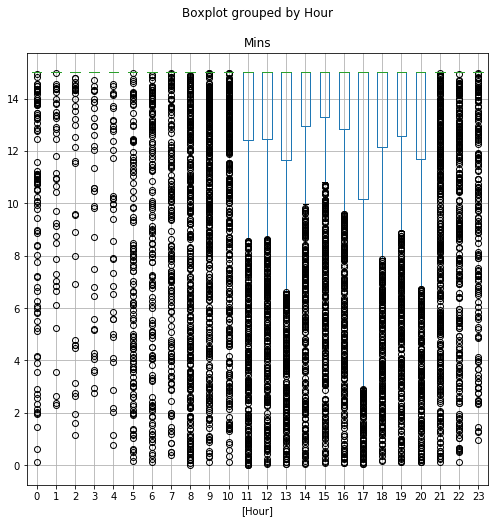

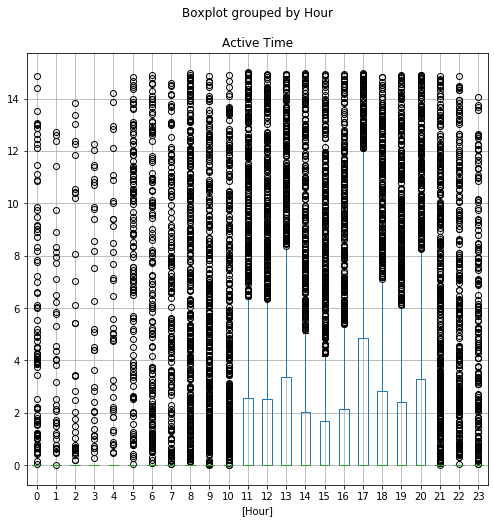

In [82]:
df['Mins'] = df['Inactive duration (ms)'].apply(lambda x: x/(1000*60))
df['Active Time'] = df['Mins'].apply(lambda x: 15-x)
df[['Mins', 'Hour']].boxplot(by='Hour', figsize=(8,8))
df[['Active Time', 'Hour']].boxplot(by='Hour', figsize=(8,8))
plt.show()

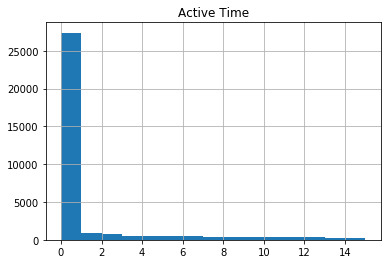

In [83]:
df.hist(column='Active Time', bins=15)
plt.show()

In [84]:
df['Active Time'].describe()

count    33833.000000
mean         1.282241
std          3.161424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.997950
Name: Active Time, dtype: float64

count    8760.000000
mean        4.952290
std         8.226492
min         0.000000
25%         0.000000
50%         0.000000
75%         7.838796
max        48.468250
Name: Active Time, dtype: float64

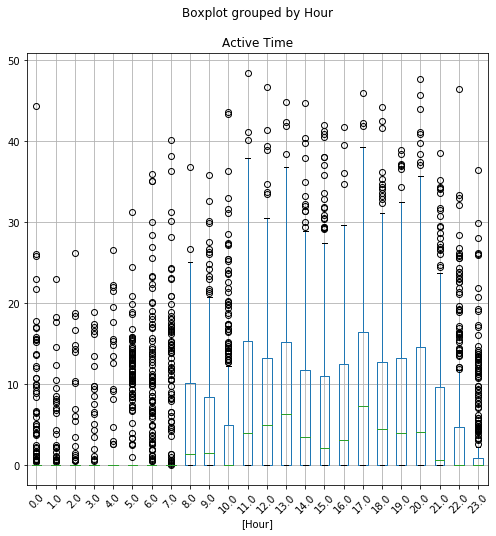

In [85]:
df_hour = df.resample('H').agg({'Active Time': 'sum', 'Hour': 'mean'})
df_hour[['Active Time', 'Hour']].boxplot(by='Hour', rot=45, figsize=(8,8))
df_hour['Active Time'].describe()



Number of 0 values:  4987
Percentage of 0 values:  56.93
Total amount of values between 0-2:  5368


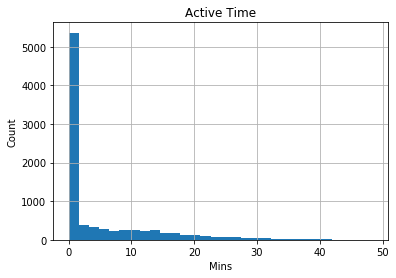

In [86]:
print('Number of 0 values: ',df_hour['Active Time'].value_counts()[0])
print('Percentage of 0 values: ',round(df_hour['Active Time'].value_counts(normalize=True)[0], 4) *100)
print('Total amount of values between 0-2: ',df_hour['Active Time'].value_counts(bins=30)[0])
df_hour.hist(column='Active Time', bins=30)
plt.ylabel('Count')
plt.xlabel('Mins')
plt.show()

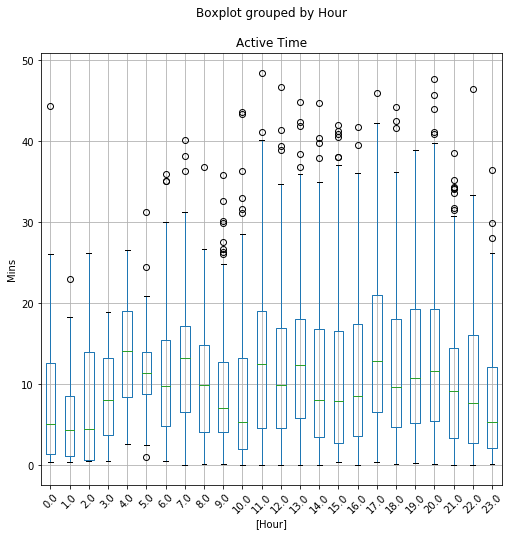

In [87]:
df_hour_trimmed = df_hour[(df_hour['Active Time']>0)]
df_hour_trimmed[['Active Time', 'Hour']].boxplot(by='Hour', rot=45, figsize=(8,8))
plt.ylabel('Mins')
plt.show()

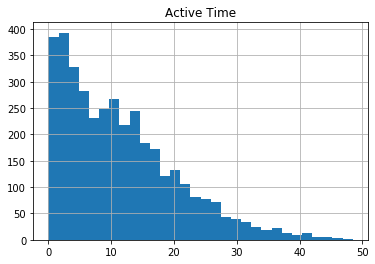

In [88]:
df_hour_trimmed.hist(column='Active Time', bins=30)
plt.show()

In [89]:
df_hour_trimmed['Active Time'].describe()

count    3773.000000
mean       11.498027
std         9.047993
min         0.006050
25%         4.069700
50%         9.798367
75%        16.680283
max        48.468250
Name: Active Time, dtype: float64

In [90]:
df_hour_top = df_hour[(df_hour['Active Time']<=0)]
df_hour_top['Active Time'].describe()

count    4987.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Active Time, dtype: float64

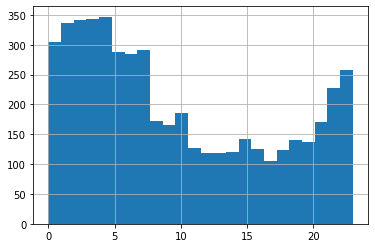

In [91]:
df_hour_top['Hour'].hist(bins=24)
plt.show()
#df_hour_top[df_hour_top['Hour'].isnull()]

### Dataset Review
#### The amount of active time per hour in 2019.
    1. Ranging from 0-60 active minutes
    2. Spanning all hours of the day
    3. Left-skewed

#### The amount of completely inactive time for each hour in 2019
    1. The importance is the frequency for each hour 

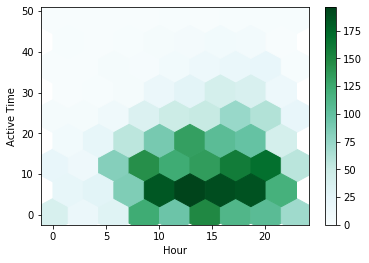

In [92]:
df_hour_trimmed.plot.hexbin(x='Hour', y='Active Time', gridsize=8, sharex=False)
plt.show()

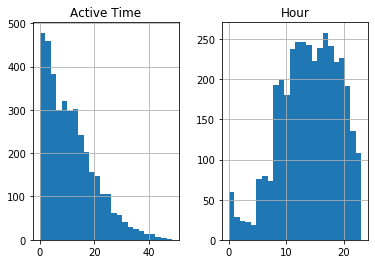

In [93]:
df_heatmap = df_hour_trimmed[['Active Time', 'Hour']]
df_heatmap.hist(bins=24)
plt.show()

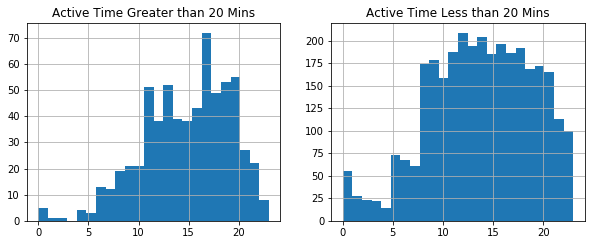

In [94]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(221)
ax = df_hour_trimmed[df_hour_trimmed['Active Time'] > 20]['Hour'].hist(bins=24)
ax.title.set_text('Active Time Greater than 20 Mins')

ax2 = fig.add_subplot(222)
ax2 = df_hour_trimmed[df_hour_trimmed['Active Time'] < 20]['Hour'].hist(bins=24)
ax2.title.set_text('Active Time Less than 20 Mins')

In [95]:
df_heatmap['Active Time'] = round(df_heatmap['Active Time'])
df_heatmap = pd.crosstab(df_heatmap['Active Time'], df_heatmap['Hour'])

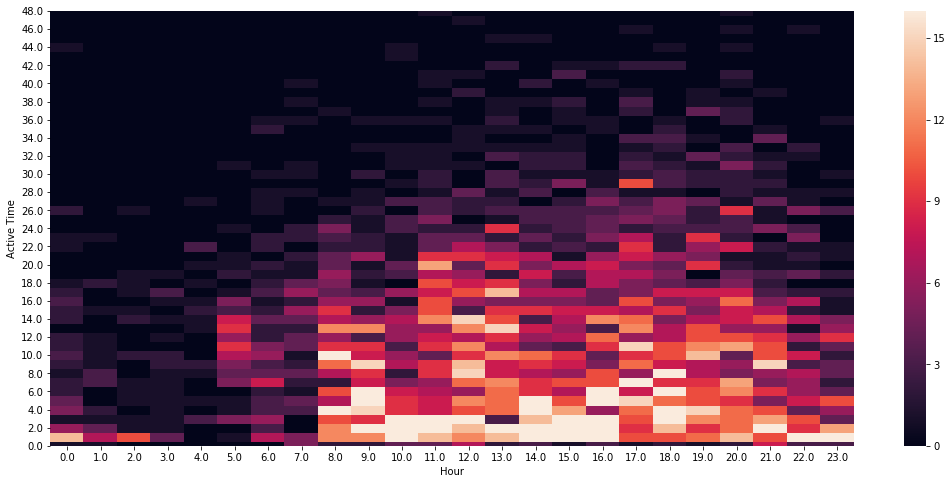

In [96]:
plt.subplots(figsize=(18,8)) 
ax = sns.heatmap(df_heatmap, robust=True)
#ax = sns.heatmap(df_heatmap, robust=True, mask = (df_heatmap == 0))
ax.invert_yaxis()

In [97]:
df_heatmap = df_hour_top[['Active Time', 'Hour']]
df_heatmap = pd.crosstab(df_heatmap['Active Time'], df_heatmap['Hour'])
df_heatmap

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Active Time,,,,,,,,,,,,,,,,,,,,,
0.0,305,336,341,343,347,288,285,292,172,166,...,121,142,126,106,123,141,137,171,228,257


In [98]:
df_hour_trimmed.groupby('Hour').count().T

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Active Time,60,29,24,22,18,76,80,73,193,199,...,243,223,239,258,241,222,227,192,135,108


In [99]:
df_heatmap_totals = [365] * 24
df_dic = dict(enumerate(df_heatmap_totals))
df_heatmap_labels = df_heatmap.append(df_dic, ignore_index=True)
df_hmap_percent = dict((df_heatmap_labels.T[0] / df_heatmap_labels.T[1]))
df_hmap_percent = pd.DataFrame(df_hmap_percent, index=[0])
df_hmap_percent

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
0,0.835616,0.920548,0.934247,0.939726,0.950685,0.789041,0.780822,0.8,0.471233,0.454795,...,0.331507,0.389041,0.345205,0.290411,0.336986,0.386301,0.375342,0.468493,0.624658,0.70411


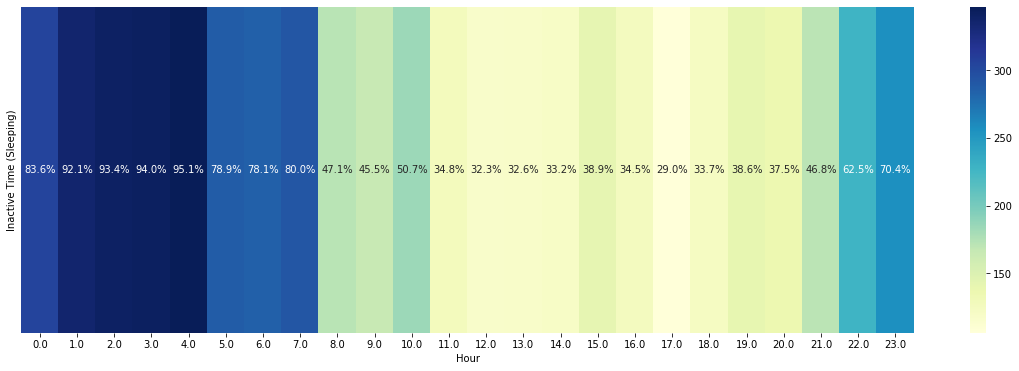

In [100]:
plt.subplots(figsize=(20,6)) 
ax = sns.heatmap(df_heatmap, annot=df_hmap_percent, cmap="YlGnBu", fmt='.01%',yticklabels=False)
ax.set_ylabel('Inactive Time (Sleeping)')
plt.show()

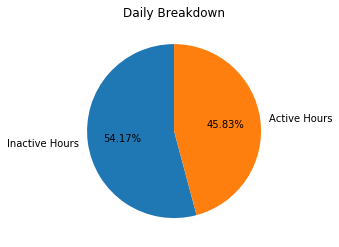

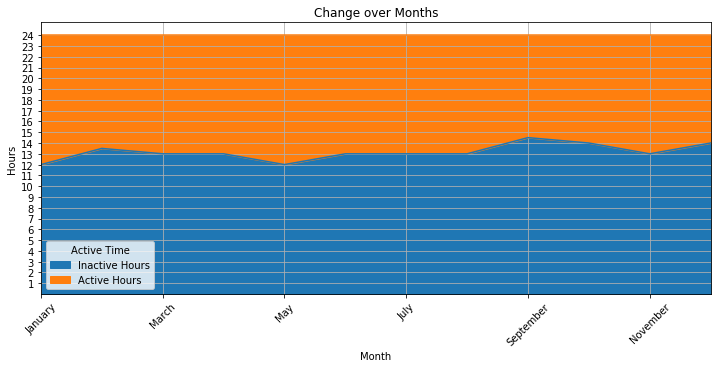

In [101]:
df_heatmap_pie =df_hour_top[['Active Time', 'Hour']]
df_heatmap_pie['Date'] = df_heatmap_pie.index.date
df_heatmap_pie = pd.crosstab(df_heatmap_pie['Date'],df_heatmap_pie['Active Time'])
df_heatmap_pie.rename(columns={0.0:'Inactive Hours'}, inplace = True)
df_heatmap_pie['Active Hours'] =(24 - df_heatmap_pie['Inactive Hours'])
df_heatmap_pie.median().plot.pie(title = 'Daily Breakdown', autopct='%.2f%%', startangle=90)
plt.ylabel('')
df_heatmap_pie.index = pd.to_datetime(df_heatmap_pie.index)
df_heatmap_pie['Month'] = df_heatmap_pie.index.month_name()
df_heatmap_pie.groupby('Month').median().reindex(['January', 'February','March', 'April', 
                                                  'May', 'June', 'July', 'August', 'September', 
                                                  'October', 'November','December']).plot.area(title='Change over Months',
                                                                                               yticks=range(1,25), rot=45, 
                                                                                               grid=True, figsize=(12,5))
plt.ylabel('Hours')
plt.show()

In [102]:
def timeframe(x):
    whattime = ' '
    if x in range(5,11):
        # 5am - 10am
        whattime = 'Morning'
    elif x in range(11,18):
        # 11am - 5pm
        whattime = 'Afternoon'
    elif x in range(18,23):
        # 6pm - 10pm
        whattime = 'Evening'
    else:
        # 11pm - 4am
        whattime = 'Night'
    
    return (whattime)

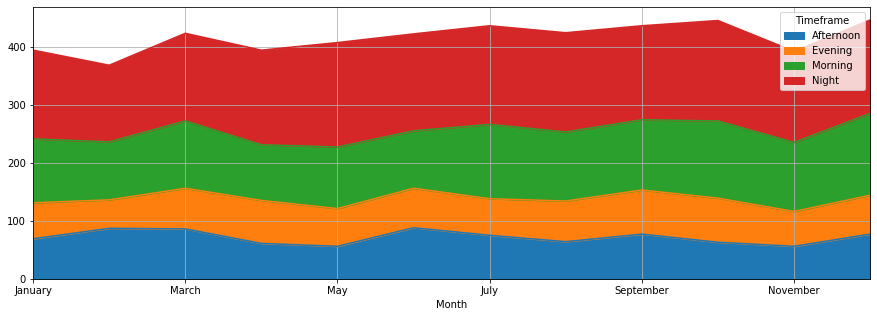

In [103]:
df_heatmap_stack = df_hour_top[['Active Time', 'Hour']]
df_heatmap_stack['Month'] = df_heatmap_stack.index.month_name()
df_heatmap_stack['Timeframe'] = df_heatmap_stack['Hour'].apply(lambda x: timeframe(x))
df_heatmap_stack_ct = pd.crosstab(df_heatmap_stack['Month'],df_heatmap_stack['Timeframe'])
df_heatmap_stack_ct = df_heatmap_stack_ct.reindex(['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December'])
df_heatmap_stack_ct.plot.area(grid=True, figsize=(15,5))
plt.show()

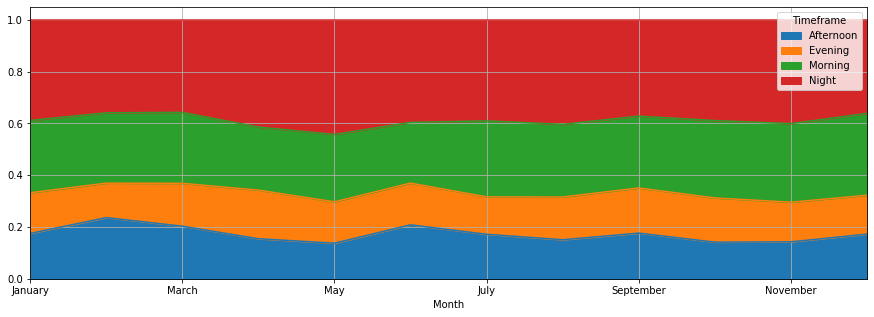

In [104]:
df_heatmap_stack_ct = df_heatmap_stack_ct.div(df_heatmap_stack_ct.sum(axis=1), axis=0)
df_heatmap_stack_ct.apply(lambda x: round((x*100),2))
df_heatmap_stack_ct.plot.area(grid=True, figsize=(15,5))
plt.show()

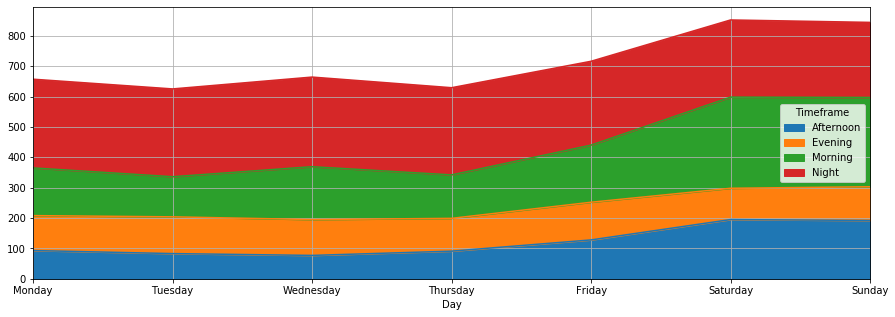

In [105]:
df_heatmap_stack = df_hour_top[['Active Time', 'Hour']]
df_heatmap_stack['Day'] = df_heatmap_stack.index.day_name()
df_heatmap_stack['Timeframe'] = df_heatmap_stack['Hour'].apply(lambda x: timeframe(x))
df_heatmap_stack_ct = pd.crosstab(df_heatmap_stack['Day'],df_heatmap_stack['Timeframe'])
df_heatmap_stack_ct = df_heatmap_stack_ct.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_heatmap_stack_ct.plot.area(grid=True, figsize=(15,5))
plt.show()

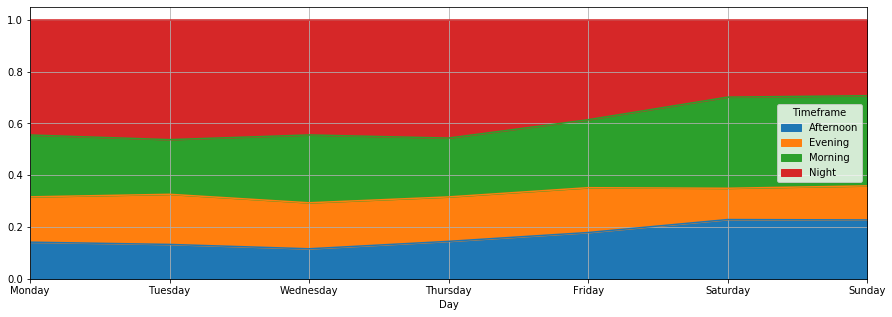

In [106]:
df_heatmap_stack_ct = df_heatmap_stack_ct.div(df_heatmap_stack_ct.sum(axis=1), axis=0)
df_heatmap_stack_ct.apply(lambda x: round((x*100),2))
df_heatmap_stack_ct.plot.area( grid=True, figsize=(15,5))
plt.show()

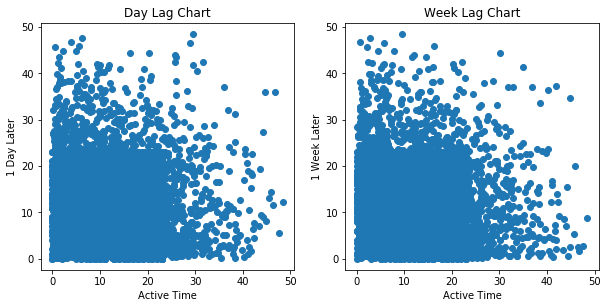

In [107]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
ax = lag_plot(df_hour_trimmed[['Active Time', 'Hour']], lag=24)
ax.title.set_text('Day Lag Chart')
ax.set_xlabel('Active Time')
ax.set_ylabel('1 Day Later')

ax1 = fig.add_subplot(222)
ax1 = lag_plot(df_hour_trimmed[['Active Time', 'Hour']], lag=24*7)
ax1.title.set_text('Week Lag Chart')
ax1.set_xlabel('Active Time')
ax1.set_ylabel('1 Week Later')

plt.show()

## Original data visualization without data cleaning

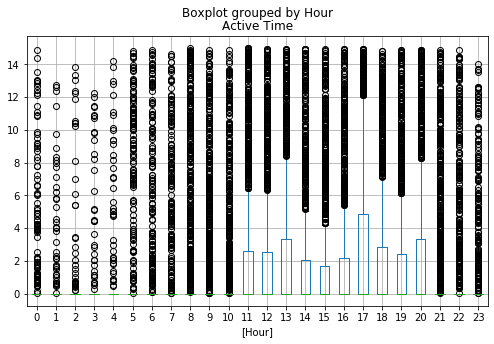

In [108]:
df[['Active Time', 'Hour']].boxplot(by='Hour', figsize=(8,5))
plt.show()

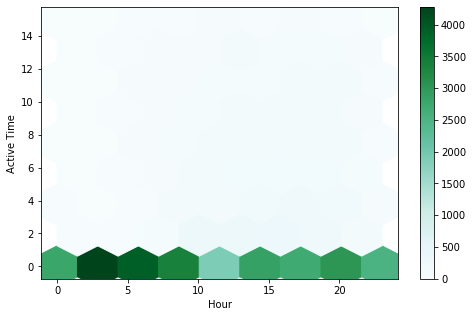

In [109]:
df.plot.hexbin(x='Hour', y='Active Time', gridsize=8, sharex=False, figsize=(8,5))
plt.show()

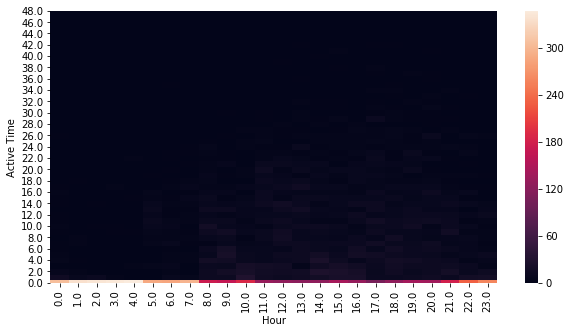

In [110]:
df_heatmap = df_hour[['Active Time', 'Hour']]
df_heatmap['Active Time'] = round(df_heatmap['Active Time'])
df_heatmap = pd.crosstab(df_heatmap['Active Time'], df_heatmap['Hour'])
plt.subplots(figsize=(10,5)) 
ax = sns.heatmap(df_heatmap)
ax.invert_yaxis()

## Additional Exploration

In [111]:
df_explore = df[df['Inactive duration (ms)']<900000]
df_explore.drop(columns = ['Inactive duration (ms)', 'Walking duration (ms)', 'Start time', 'End time', 'Running duration (ms)', 'Mins'], inplace=True)
df_explore = df_explore.resample('H').agg({'Calories (kcal)': 'sum', 'Distance (m)': 'sum', 'Step count': 'sum', 'Move Minutes count': 'sum', 'Hour': 'mean', 'Active Time' : 'mean'})
df_explore.dropna(inplace=True)
df_explore['Day'] = df_explore.index.day_name()
df_explore['Month'] = df_explore.index.month_name()
df_explore

C:\Users\curti\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Calories (kcal),Distance (m),Step count,Move Minutes count,Hour,Active Time,Day,Month
DateTime,,,,,,,,
2019-01-01 13:00:00,99.340617,511.583329,863.0,12.0,13.0,10.138308,Tuesday,January
2019-01-01 16:00:00,80.419984,298.093090,511.0,8.0,16.0,6.446183,Tuesday,January
2019-01-01 21:00:00,74.296793,450.827863,757.0,11.0,21.0,5.547483,Tuesday,January
2019-01-01 23:00:00,60.848867,326.671700,559.0,7.0,23.0,3.573708,Tuesday,January
2019-01-02 13:00:00,94.071792,509.168409,997.0,12.0,13.0,4.078700,Wednesday,January
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,72.846825,557.087474,825.0,11.0,19.0,5.157200,Tuesday,December
2019-12-31 20:00:00,48.214641,300.182961,481.0,9.0,20.0,3.526142,Tuesday,December
2019-12-31 21:00:00,25.727273,191.376755,278.0,4.0,21.0,2.264950,Tuesday,December


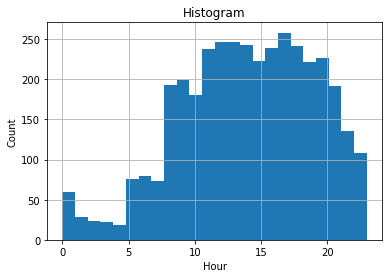

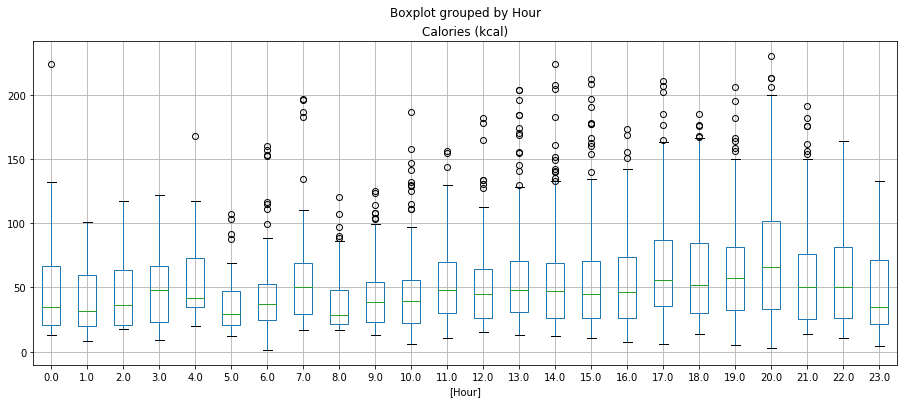

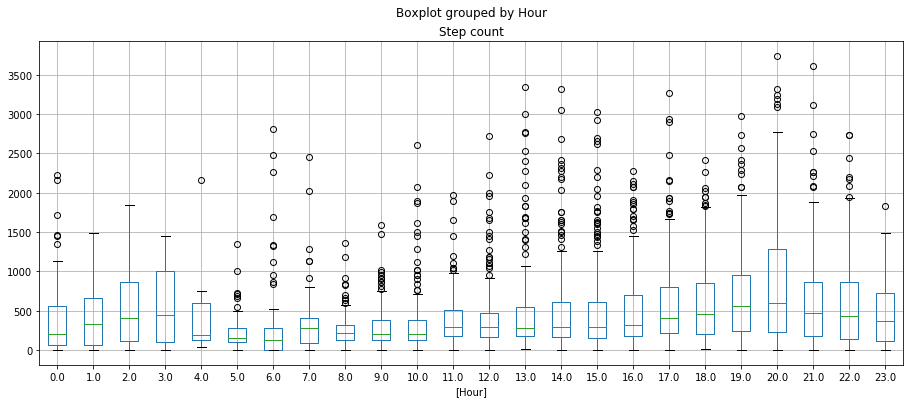

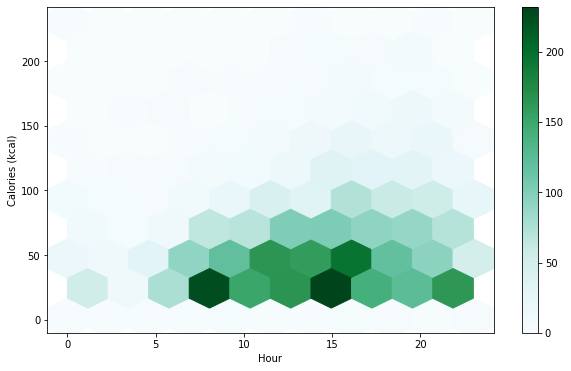

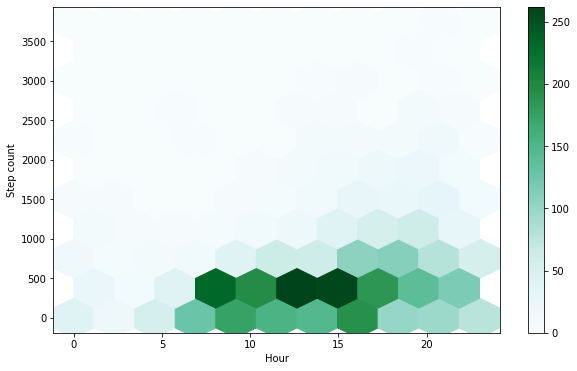

In [128]:
df_explore[['Hour']].hist(bins=24)
plt.ylabel('Count')
plt.xlabel('Hour')
plt.title('Histogram')
df_explore[['Calories (kcal)' , 'Hour']].boxplot(by='Hour', figsize = (15,6))
df_explore[['Step count' , 'Hour']].boxplot(by='Hour', figsize = (15,6))
df_explore[['Calories (kcal)', 'Hour']].plot.hexbin(x='Hour', y= 'Calories (kcal)', gridsize=10, sharex=False, figsize = (10,6))
df_explore[['Step count' , 'Hour']].plot.hexbin(x='Hour', y= 'Step count', gridsize=10, sharex=False, figsize = (10,6))
plt.show()

In [136]:
df_explore = df_explore.resample('D').sum()
df_explore.drop(columns ='Hour', inplace=True)

,Calories (kcal),Distance (m),Step count,Move Minutes count,Active Time
DateTime,,,,,
2019-01-01,314.906261,1587.175982,2690.0,38.0,25.705683
2019-01-02,640.436675,3031.288382,5494.0,77.0,51.841267
2019-01-03,755.672536,4947.336234,8080.0,96.0,70.632242
2019-01-04,469.146751,1935.697394,3732.0,49.0,44.437172
2019-01-05,842.109198,5322.153775,9060.0,118.0,54.596556
...,...,...,...,...,...
2019-12-27,549.819936,3040.454998,4823.0,86.0,64.865364
2019-12-28,134.108093,1028.086519,1560.0,24.0,20.402092
2019-12-29,632.832654,3967.746088,6251.0,109.0,49.757129


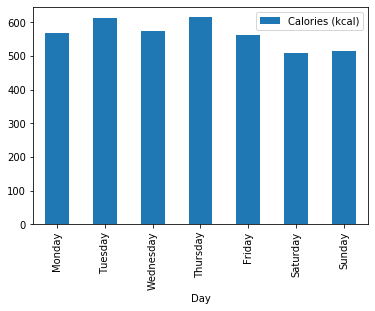

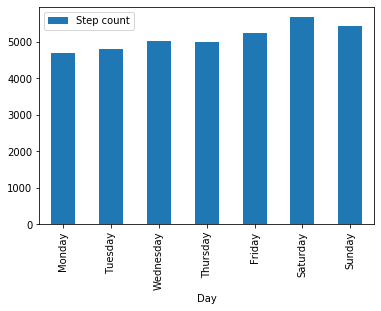

In [170]:
df_explore['Day'] = df_explore.index.day_name()
gb = df_explore.groupby('Day')
gb.mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot.bar(y='Calories (kcal)')
gb.mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot.bar(y='Step count')
plt.show()